## The sixth Lab-assignment (08/02/2022 11:59'AM' - 08/05/2022 11:59PM, 50 points in total)

The purpose of this exercise is to build a simple predicition model which can helpyou understand the workflow of machine learning. 

### Q1 Task Decription (50 Points)

The goal of this assignment is to predict bike share use, given the hour, day, and information about the weather. Companies like Divvy try to predict how much demand there will be for bikes on any given day to allocate resources to redistribute bikes so that, ideally, very few bike stations are ever full (when you can’t park your bike) or empty (when you can’t pick up a bike if you want to).

The data (link: https://github.com/suthapalliuday/INFO5502-Summer2022/tree/main/datasets/lab_assignment_06) in Github provides detailed information on the data set and necessary downloads.

### Data Description

You are provided hourly rental data spanning two years (link: https://github.com/suthapalliuday/INFO5502-Summer2022/tree/main/datasets/lab_assignment_06). For this task, the training set is comprised of the first 16 days of each month, while the test set is the 17-19th day of the month. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period. That is, predict "count" without using "count" or its components "casual" and "registered".

Data Fields

datetime - hourly date + timestamp

season - 1 = spring, 2 = summer, 3 = fall, 4 = winter

holiday - whether the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday

weather -

1 - Clear, Few clouds, Partly cloudy, Partly cloudy

2 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4 - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

count - number of total rentals

### Output

Submission Format

Your output (a separate file) must have a header line and should be structured in the following format:

 datetime,count
 
 2011-01-20 00:00:00,0 
 
 2011-01-20 01:00:00,0
 
 2011-01-20 02:00:00,0
 
 ...
 
The tutorial code should demonstrate how to generate such a file from a very simple prediction model. Note, these prediction are to be done on the test file under the data tab, where you do not know the actual count, and should match the rows of the test file in count and order.

Your predictions should be compared to the ground truth information (sample_prediction.csv). Score are calculated using Root Mean Squared Error (RMSE).

### Tips

●	Add features: Pick columns/features from the data you already have. Or make a new feature from the ones you have. For example, the tutorial makes ‘hour’ from the datetime stamp, which seemed very useful. How about ‘month’?

●	Model selection: Try different models. Make sure they are regression models rather than classification models. Tip: random forest regression is a good, all around modeling strategy on complicated data sets.

●	Model tuning: Almost all regression models have parameters to tune (“hyperparameters”). E.g. polynomial regression has the degree of the polynomial (n = 1 for a line, n=2 for a quadratic fit, n=3 for a cubic fit…). Generally, one extreme makes the model too simple (e.g. a line for a curved set of points) and the other extreme makes the model overfit/be too complex, and usually the right choice is in between. For some models it is obvious what to tune (e.g. k for k nearest neighbors regression) and some don’t need much tuning with defaults that often work well. e.g. try changing the number of trees used in the random forest model!

●	Cross validation: The tutorial has a simple way of separating training and test data, however, there are better ways of splitting training and test data. Look into cross validation techniques, which are more reliable than an arbitrary split of training and test data.

●	Separate models for ...: Notice that count comes from just adding casual riders and registered riders. However, what if these two types of riders acted very differently? It might make sense to make two separate models and just add the results of both models together. This is also true for any subsets of your data that may behave wildly differently (e.g. create a separate model for each season?)

### Your code

# You code here:




In [ ]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# take dataset

df=pd.read_csv('train_luc.csv')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9169,2012-12-16 19:00:00,4,0,0,1,14.76,17.425,93,8.9981,10,99,109
9170,2012-12-16 20:00:00,4,0,0,2,15.58,19.695,82,0.0000,14,108,122
9171,2012-12-16 21:00:00,4,0,0,2,14.76,18.940,93,0.0000,14,92,106
9172,2012-12-16 22:00:00,4,0,0,2,16.40,20.455,82,12.9980,6,83,89


In [ ]:
df.shape

(9174, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9174 entries, 0 to 9173
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    9174 non-null   object 
 1   season      9174 non-null   int64  
 2   holiday     9174 non-null   int64  
 3   workingday  9174 non-null   int64  
 4   weather     9174 non-null   int64  
 5   temp        9174 non-null   float64
 6   atemp       9174 non-null   float64
 7   humidity    9174 non-null   int64  
 8   windspeed   9174 non-null   float64
 9   casual      9174 non-null   int64  
 10  registered  9174 non-null   int64  
 11  count       9174 non-null   int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 860.2+ KB


In [ ]:
df.isnull().sum()


datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
df.describe()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000
mean,2.505559,0.031284,0.678875,1.414868,20.130401,23.578433,61.715064,12.737931,35.713647,154.868106,190.581753
std,1.116618,0.174094,0.466934,0.635363,7.940504,8.617957,19.401829,8.199027,49.667738,150.981155,181.011530
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,46.000000,7.001500,4.000000,35.000000,41.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,61.000000,11.001400,16.000000,117.000000,144.000000
75%,4.000000,0.000000,1.000000,2.000000,27.060000,31.060000,78.000000,16.997900,48.000000,222.000000,282.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,45.455000,100.000000,56.996900,362.000000,886.000000,977.000000


In [ ]:
def hour_of_day(dt):
    
    return datetime.strptime(dt, "%Y-%m-%d %H:%M:%S").time().hour
 
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9169,2012-12-16 19:00:00,4,0,0,1,14.76,17.425,93,8.9981,10,99,109
9170,2012-12-16 20:00:00,4,0,0,2,15.58,19.695,82,0.0000,14,108,122
9171,2012-12-16 21:00:00,4,0,0,2,14.76,18.940,93,0.0000,14,92,106
9172,2012-12-16 22:00:00,4,0,0,2,16.40,20.455,82,12.9980,6,83,89


In [ ]:
#other parameters from data set

dto=pd.to_datetime(df['datetime'])

df['Month'] = dto.dt.strftime('%m')
df['Year'] = dto.dt.strftime('%y')
    
#df['day']= dto.dt.day_name()

df['day_num']=dto.dt.dayofweek

df['hour'] = df['datetime'].map(hour_of_day)
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Month,Year,day_num,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,01,11,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,01,11,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,01,11,5,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,01,11,5,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,01,11,5,4


In [ ]:
df.shape  #columns added


(9174, 16)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9174 entries, 0 to 9173
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    9174 non-null   object 
 1   season      9174 non-null   int64  
 2   holiday     9174 non-null   int64  
 3   workingday  9174 non-null   int64  
 4   weather     9174 non-null   int64  
 5   temp        9174 non-null   float64
 6   atemp       9174 non-null   float64
 7   humidity    9174 non-null   int64  
 8   windspeed   9174 non-null   float64
 9   casual      9174 non-null   int64  
 10  registered  9174 non-null   int64  
 11  count       9174 non-null   int64  
 12  Month       9174 non-null   object 
 13  Year        9174 non-null   object 
 14  day_num     9174 non-null   int64  
 15  hour        9174 non-null   int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 1.1+ MB


In [ ]:
#checking highest ,lowest values to outliers-filter 

print('highest value',   df['count'].mean() + 3*df['count'].std())
print('lowest value',    df['count'].mean() - 3*df['count'].std())

highest value 733.6163438168348
lowest value -352.4528382576459


In [ ]:
# excluding of outlier values

df1 = df[(df['count']  <  733.6163438168348) & (df['count']  >  -352.4528382576459)]
df1.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Month,Year,day_num,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,01,11,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,01,11,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,01,11,5,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,01,11,5,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,01,11,5,4


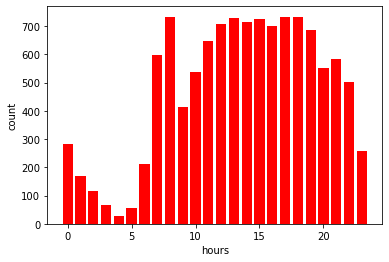

In [ ]:
plt.bar(df1['hour'],df1['count'], color='red')
plt.xlabel('hours')
plt.ylabel('count')
plt.show()

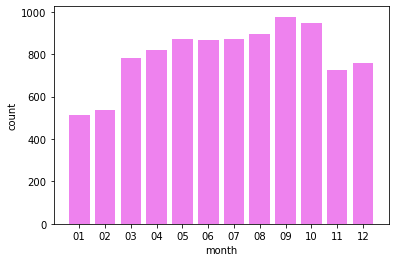

In [ ]:
plt.bar(df['Month'],df['count'], color='violet')
plt.xlabel('month')
plt.ylabel('count')
plt.show()

In [ ]:
columns=['hour','temp','Month','season','workingday']
columns


['hour', 'temp', 'Month', 'season', 'workingday']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold

x = df1[columns]
x

,hour,temp,Month,season,workingday
0,0,9.84,01,1,0
1,1,9.02,01,1,0
2,2,9.02,01,1,0
3,3,9.84,01,1,0
4,4,9.84,01,1,0
...,...,...,...,...,...
9169,19,14.76,12,4,0
9170,20,15.58,12,4,0
9171,21,14.76,12,4,0
9172,22,16.40,12,4,0


In [ ]:
# for k fold
x = preprocessing.scale(x) 
y = df1['count'].values
y = preprocessing.scale(y) 

casual=df1['casual'].values
casual= preprocessing.scale(casual)

registered=df1['registered'].values
registered= preprocessing.scale(registered)


x_train,     x_test,     y_train,     y_test     = train_test_split(x,y,test_size=0.2,random_state=50)
x_train_cas, x_test_cas, y_train_cas, y_test_cas = train_test_split(x,casual,test_size=0.2,random_state=50)
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x,registered,test_size=0.2,random_state=50)

x_train.shape ,y_train.shape, x_test.shape, y_test.shape


((7242, 5), (7242,), (1811, 5), (1811,))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import VotingRegressor
paramters = {
    'bootstrap': [True],
    'max_depth': [70, 80, 90, 100, 110, 120],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 500, 1000]
}
paramters

{'bootstrap': [True],
 'max_depth': [70, 80, 90, 100, 110, 120],
 'max_features': [2, 3],
 'min_samples_leaf': [3, 4, 5],
 'min_samples_split': [8, 10, 12],
 'n_estimators': [100, 200, 500, 1000]}

In [ ]:
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

model = RandomForestRegressor(max_depth=120,n_estimators = 500 , max_features=3, min_samples_leaf=3,min_samples_split=8 )
print("columns being used:",columns)
print(model)

columns being used: ['hour', 'temp', 'Month', 'season', 'workingday']
RandomForestRegressor(max_depth=120, max_features=3, min_samples_leaf=3,
                      min_samples_split=8, n_estimators=500)


RMS error: 0.4666477769933504
RMS error for casual: 0.9351142243323137
RMS error for registered: 0.43027203736925995


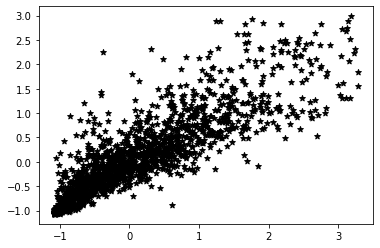

In [ ]:
# fit the model to the training subset of original training data

model.fit(x_train, y_train)
model.fit(x_train_cas, y_train_cas)
model.fit(x_train_reg, y_train_reg)
y_pred = model.predict(x_test)
y_pred_casual = model.predict(x_test_cas)
y_pred_resgistered = model.predict(x_test_reg)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


# root mean square
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMS error:",rms)

#root mean square
rms_cas=np.sqrt(mean_squared_error(y_test_cas, y_pred_casual))
print("RMS error for casual:",rms_cas)

#root mean square
rms_reg=np.sqrt(mean_squared_error(y_test_reg, y_pred_resgistered))
print("RMS error for registered:",rms_reg)

plt.scatter(y_test, y_pred, c='black', marker='*')
plt.show()

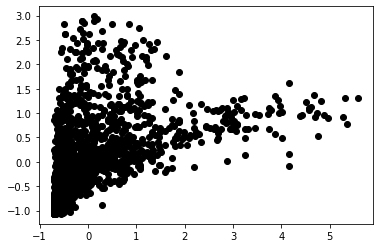

In [ ]:
plt.scatter(y_test_cas, y_pred_casual, c='black')
plt.show()

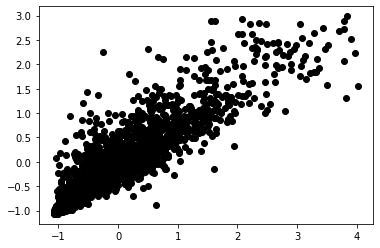

In [ ]:
plt.scatter(y_test_reg, y_pred_resgistered, c='black')
plt.show()

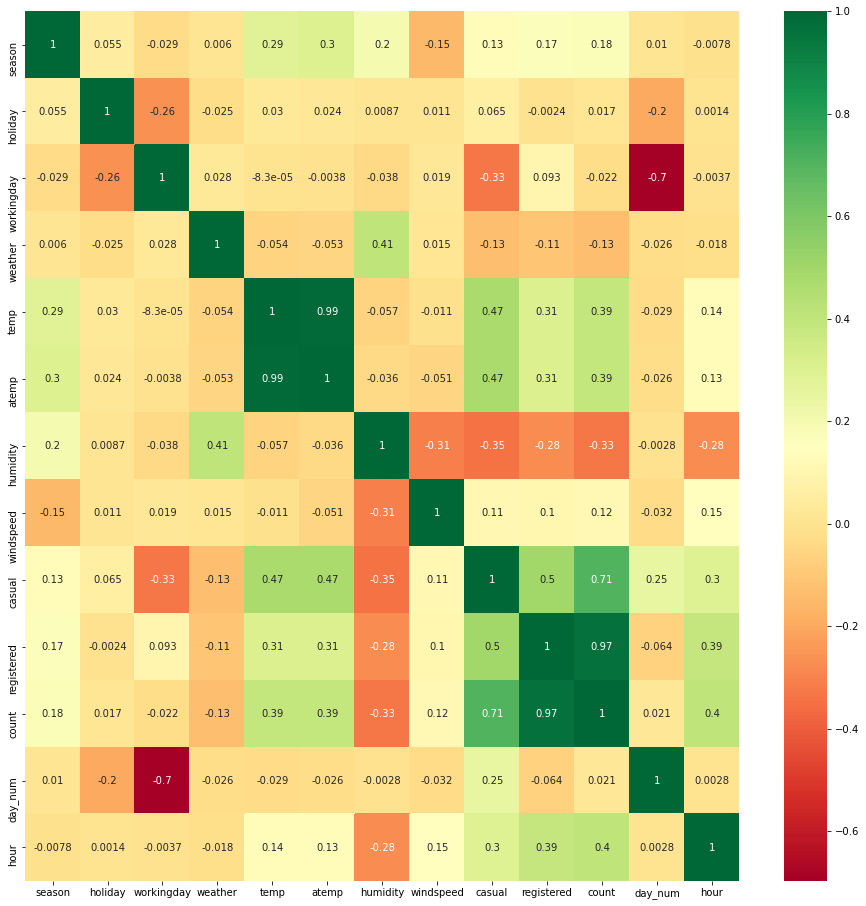

In [ ]:
plt.figure(figsize = (16,16))
sb.heatmap(df1.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [ ]:
#feature importance

df1_imp = model.feature_importances_
std     = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(df1_imp)[::-1]

In [ ]:
print("Feature ranking:")

for f in range(df1[columns].shape[1]):
    
    print("%d. feature %s (%f)" % (f + 1, columns[indices[f]], df1_imp[indices[f]]))

Feature ranking:
1. feature hour (0.690451)
2. feature temp (0.120466)
3. feature workingday (0.097276)
4. feature Month (0.068858)
5. feature season (0.022949)


# test data

In [ ]:
# testing case-dataset

test_df = pd.read_csv('test_luc.csv')

sample_df=pd.read_csv('sample_prediction.csv')

print("\nNumber of samples:",test_df.shape[0] ,"and number of features:",test_df.shape[1],"\n")
print('---------------------------------------------------------')


dto1=pd.to_datetime(df['datetime'])

# add the new features into this test data, then use in predict the value

test_df['hour'] = test_df['datetime'].map(hour_of_day)
test_df['Month'] = dto1.dt.strftime('%m')
test_df['Year'] = dto1.dt.strftime('%y')
test_df['day_num']=dto1.dt.dayofweek
print('---------------------------------------------------------')

#  added the column

test_df.head()

# fit the selected model TO YOUR FULL TRAINING SET

model.fit(df[columns], df['count'])
model.fit(df[columns],  df['casual'])
model.fit(df[columns],  df['registered'])

# apply to the test data FOR WHICH YOU DON'T HAVE THE ANSWERS

pred_count = model.predict(test_df[columns])
casual_count=model.predict(test_df[columns])
registered_count=model.predict(test_df[columns])


# add the prediction column (in case you want to inspect it later)
test_df['casual']=casual_count
test_df['registered']=registered_count
test_df['count'] = pred_count
test_df['added_predict_count']=test_df['casual']+test_df['registered']

print(test_df)
print('---------------------------------------------------------')

rms1 = np.sqrt(mean_squared_error(sample_df['count'],test_df['count']))
print("RMS error:",rms1)
print('---------------------------------------------------------')
rms_added=np.sqrt(mean_squared_error(sample_df['count'],test_df['added_predict_count']))
print("RMS error taken by adding:",rms_added)
print('---------------------------------------------------------')

normalized_rmse=rms1/(test_df['count'].max()-test_df['count'].min())
print("normalized_rmse is :", normalized_rmse)
print('---------------------------------------------------------')

# save the predicted count as a csv with a header column and datetime row
test_df = test_df[['datetime','count']].to_csv('my_prediction.csv', 
    index=False, header=True)

print("Prediction done !!!.... saved as file_name is  my_prediction.csv")


Number of samples: 1712 and number of features: 9 

---------------------------------------------------------
---------------------------------------------------------
                 datetime  season  holiday  workingday  weather   temp  \
0     2011-01-17 00:00:00       1        1           0        2   8.20   
1     2011-01-17 01:00:00       1        1           0        2   8.20   
2     2011-01-17 02:00:00       1        1           0        2   7.38   
3     2011-01-17 03:00:00       1        1           0        2   7.38   
4     2011-01-17 04:00:00       1        1           0        2   7.38   
...                   ...     ...      ...         ...      ...    ...   
1707  2012-12-19 19:00:00       4        0           1        1  15.58   
1708  2012-12-19 20:00:00       4        0           1        1  14.76   
1709  2012-12-19 21:00:00       4        0           1        1  13.94   
1710  2012-12-19 22:00:00       4        0           1        1  13.94   
1711  2012-12-19 

 Question 2 (20 points) Build a regession model to predict the change in price of the stock overtime. It can either be linear regression or non-linear regression. You can download the dataset from here: https://github.com/suthapalliuday/INFO5502-Summer2022/blob/main/datasets/portfolio_data.csv. The implementation of the LSTM on this same dataset was posted here as an reference: https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm/notebook

 ### Your code

In [1]:
### You code here:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
df= pd.read_csv('portfolio_data.csv')
df

amzn = df[['Date','AMZN']]

amzn.index = amzn.Date
amzn.drop('Date', axis=1, inplace=True)
amzn

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(amzn)
scaled_data[:10]




/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


array([[0.        ],
       [0.00241169],
       [0.00548211],
       [0.00418137],
       [0.00530348],
       [0.00583382],
       [0.00666005],
       [0.00859721],
       [0.00908848],
       [0.01122102]])

In [2]:
train = amzn[0:1000]
valid = amzn[1000:]
valid

Xtrain, ytrain = [], []
for i in range(60, len(train)):
    Xtrain.append(scaled_data[i-60: i, 0])
    ytrain.append(scaled_data[i,0])
    
    pass

In [3]:

import numpy as np
import tensorflow as tf
Xtrain, ytrain = np.array(Xtrain), np.array(ytrain)

Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], 1))
Xtrain.shape

m = tf.keras.Sequential()
m.add(tf.keras.layers.LSTM(units = 20, return_sequences = True, input_shape = (Xtrain.shape[1], 1)))
m.add(tf.keras.layers.LSTM(units = 20))
m.add(tf.keras.layers.Dense(1))
m.compile(loss = 'mean_squared_error', optimizer = 'adam')
history = m.fit(Xtrain, ytrain, epochs = 20, batch_size=30)

testinputs = amzn[len(amzn) - len(valid) - 60:].values


testinputs = testinputs.reshape(-1,1)
testinputs  = scaler.transform(testinputs)


Xtest = []
for i in range(60, testinputs.shape[0]):
    Xtest.append(testinputs[i-60:i, 0])
Xtest = np.array(Xtest)





Epoch 1/20
32/32 [==============================] - 6s 48ms/step - loss: 0.0068
Epoch 2/20
32/32 [==============================] - 2s 48ms/step - loss: 3.0387e-04
Epoch 3/20
32/32 [==============================] - 2s 49ms/step - loss: 2.3313e-04
Epoch 4/20
32/32 [==============================] - 2s 49ms/step - loss: 2.3237e-04
Epoch 5/20
32/32 [==============================] - 1s 47ms/step - loss: 2.2135e-04
Epoch 6/20
32/32 [==============================] - 2s 48ms/step - loss: 2.0574e-04
Epoch 7/20
32/32 [==============================] - 1s 47ms/step - loss: 2.0243e-04
Epoch 8/20
32/32 [==============================] - 2s 50ms/step - loss: 1.9287e-04
Epoch 9/20
32/32 [==============================] - 2s 47ms/step - loss: 1.9922e-04
Epoch 10/20
32/32 [==============================] - 2s 47ms/step - loss: 1.9267e-04
Epoch 11/20
32/32 [==============================] - 2s 49ms/step - loss: 1.7543e-04
Epoch 12/20
32/32 [==============================] - 2s 47ms/step - loss: 1.65

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
cp = model.predict(Xtest)

cp

array([[0.3690557 ],
       [0.36929125],
       [0.36932   ],
       [0.36954567],
       [0.3698808 ],
       [0.37032044],
       [0.37114266],
       [0.37240645],
       [0.3747644 ],
       [0.3776199 ],
       [0.38038144],
       [0.38276738],
       [0.38462272],
       [0.38658357],
       [0.3886197 ],
       [0.39041165],
       [0.3918682 ],
       [0.39353254],
       [0.395079  ],
       [0.39674947],
       [0.397557  ],
       [0.39827588],
       [0.39892927],
       [0.39990208],
       [0.40103793],
       [0.4025341 ],
       [0.40465772],
       [0.4071307 ],
       [0.40969613],
       [0.4120673 ],
       [0.4142025 ],
       [0.41645214],
       [0.41879395],
       [0.42070866],
       [0.42248365],
       [0.42404684],
       [0.42412588],
       [0.42271537],
       [0.4210342 ],
       [0.419101  ],
       [0.41664   ],
       [0.41489455],
       [0.41399834],
       [0.41360113],
       [0.41392204],
       [0.41465044],
       [0.4156918 ],
       [0.416